In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [4]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 187.9 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/250.9 kB 328.2 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 374.1 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/250.9 kB 577.4 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 593.2 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 593.2 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 593.2 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 593.2 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 593.2 kB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df=pd.read_excel("Universities.xlsx")

In [6]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [7]:
df.shape

(25, 7)

# Make normalization

In [ ]:
unit conversion

In [8]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
nordf=norm_fun(df.iloc[:,1:])

In [10]:
nordf

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


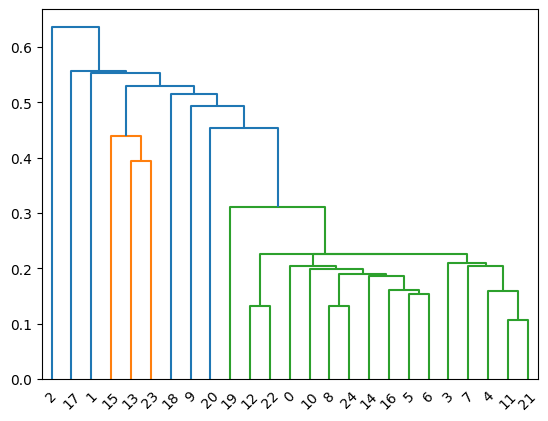

In [11]:
dendogram=sch.dendrogram(sch.linkage(nordf))

In [13]:
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean')

In [14]:
y=hc.fit_predict(nordf)

In [15]:
y

array([3, 0, 2, 3, 3, 4, 4, 3, 4, 0, 4, 3, 3, 1, 4, 1, 4, 1, 2, 0, 2, 3,
       3, 1, 4])

In [17]:
df['clusters']=y

In [18]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [19]:
df['clusters']==0

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
Name: clusters, dtype: bool

In [20]:
df[df['clusters']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
1,CalTech,1415,100,25,6,63575,81,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
19,UChicago,1290,75,50,13,38380,87,0


In [21]:
df[df['clusters']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [22]:
df[df['clusters']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
2,CMU,1260,62,59,9,25026,72,2
18,UCBerkeley,1240,95,40,17,15140,78,2
20,UMichigan,1180,65,68,16,15470,85,2


In [23]:
df[df['clusters']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
0,Brown,1310,89,22,13,22704,94,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
7,Georgetown,1255,74,24,12,20126,92,3
11,Northwestern,1260,85,39,11,28052,89,3
12,NotreDame,1255,81,42,13,15122,94,3
21,UPenn,1285,80,36,11,27553,90,3
22,UVA,1225,77,44,14,13349,92,3


In [24]:
df[df['clusters']==4]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
8,Harvard,1400,91,14,11,39525,97,4
10,MIT,1380,94,30,10,34870,91,4
14,Princeton,1375,91,14,8,30220,95,4
16,Stanford,1360,90,20,12,36450,93,4
24,Yale,1375,95,19,11,43514,96,4
